In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras

In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

### Loading the Dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


In [5]:
path ='/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

In [6]:
paths = []
data = []
result = []
for r,d,f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes'):
  for files in f:
    if files.endswith('jpg'):
      paths.append(os.path.join(r,files))
      for path in paths:
        image = Image.open(path)
        image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
        image = np.array(image)
        if image.shape == (IMAGE_SIZE,IMAGE_SIZE,3):
          data.append(image)
          result.append(encoder.transform([[0]]).toarray())


In [7]:
paths = []
for r,d,f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no'):
  for files in f:
    if files.endswith('jpg'):
      paths.append(os.path.join(r,files))
      for path in paths:
        image = Image.open(path)
        image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
        image = np.array(image)
        if image.shape == (IMAGE_SIZE,IMAGE_SIZE,3):
          data.append(image)
          result.append(encoder.transform([[1]]).toarray())


In [8]:
len(data)

6156

In [9]:
data = np.array(data)

In [10]:
data.shape

(6156, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape(6156,2)

In [12]:
result.shape

(6156, 2)

### Splitting the Training and Testing Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size = 0.2, random_state=42)

In [14]:
X_train.shape

(4924, 128, 128, 3)

In [15]:
y_train.shape

(4924, 2)

In [16]:
X_test.shape

(1232, 128, 128, 3)

In [17]:
y_test.shape

(1232, 2)

### Model 

In [18]:
model = Sequential()
model.add(Conv2D(32,(2,2),input_shape=(128,128,3),activation = 'relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.55))

model.add(Conv2D(64,(2,2),activation = 'relu',padding='Same'))

model.add(MaxPooling2D(pool_size = (2,2),strides= (2,2)))
model.add(Dropout(0.55))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       131,074 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,746 (545.88 KB)

 Trainable params: 139,746 (545.88 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss= 'categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test,y_test),verbose = 1 )

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.6947 - loss: 36.6959 - val_accuracy: 0.8904 - val_loss: 0.6729
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8671 - loss: 4.0409 - val_accuracy: 0.9854 - val_loss: 0.1539
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9210 - loss: 1.6226 - val_accuracy: 0.9935 - val_loss: 0.0378
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9429 - loss: 0.8941 - val_accuracy: 0.9984 - val_loss: 0.0429
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9475 - loss: 0.7065 - val_accuracy: 0.9984 - val_loss: 0.0358
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9573 - loss: 0.5667 - val_accuracy: 0.9984 - val_loss: 0.0371
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9712 - loss: 0.2936 - val_accuracy: 0.9984 - val_loss: 0.0235
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9788 - loss: 0.2851 - val_ac

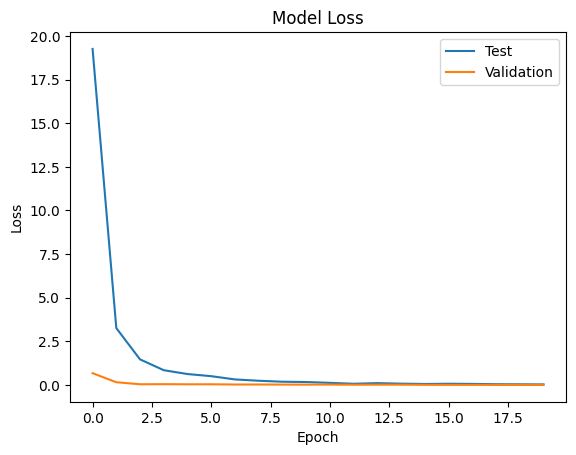

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test','Validation'], loc = 'upper right')
plt.show()

In [23]:
def names(number):
  if number == 0:
    return 'Its a Tumor'
  else:
    return 'Its not a Tumor'

100.0% Confidence Its not a Tumor


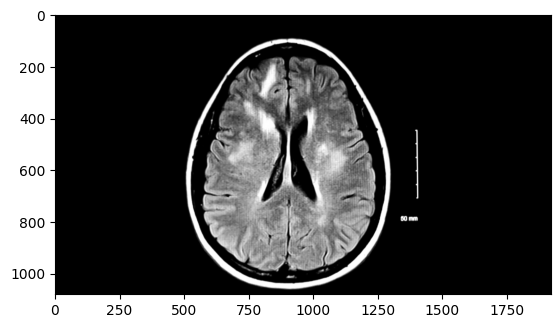

In [38]:
from matplotlib.pyplot import imshow
img = Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/no 9.png')
img = img.convert('RGB') # Convert to RGB
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence' +' '+ names(classification))

99.560036% Confidence Its not a Tumor


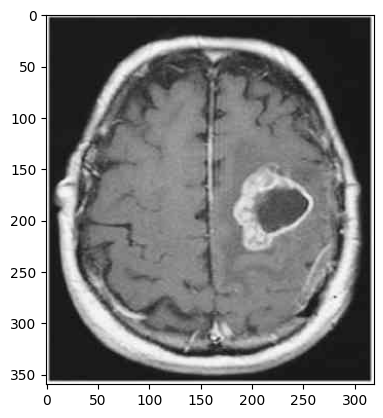

In [41]:
from matplotlib.pyplot import imshow
img = Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y10.jpg')
img = img.convert('RGB')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence' + ' ' +  names(classification))

### Collecting Random Image To Check the Model Prediction

100.0% Confidence Its a Tumor


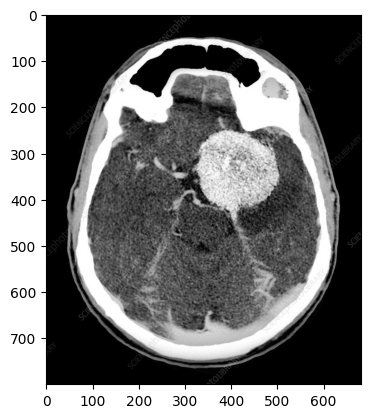

In [42]:
from matplotlib.pyplot import imshow
img = Image.open('/content/tumor.jpeg')
#img = img.convert('RGB')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence' + ' ' +  names(classification))

89.96756% Confidence Its not a Tumor


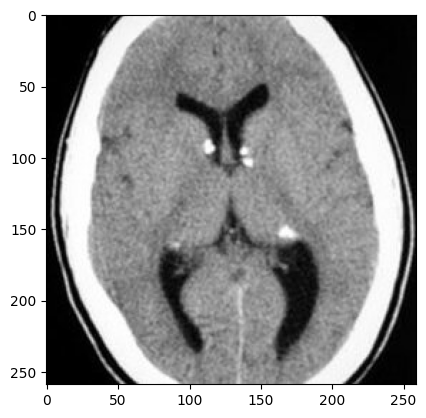

In [44]:
from matplotlib.pyplot import imshow
img = Image.open('/content/normal brain.jpg')
img = img.convert('RGB')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence' + ' ' +  names(classification))